In [1]:
from dgp import dgp
from kernel_class import kernel, combine
from synthetic import path
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

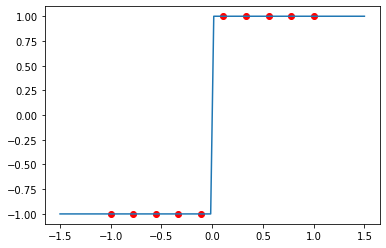

In [2]:
n=10
X=np.linspace(-1,1,n)[:,None]
f= lambda x: -1. if x<0 else 1.
Y=np.array([f(x) for x in X]).reshape(-1,1)
Xt=np.linspace(-1.5,1.5,100)[:,None]
Yt=np.array([f(x) for x in Xt]).reshape(-1,1)
plt.plot(Xt,Yt)
plt.scatter(X,Y,color='r')

In [53]:
ker1=kernel(length=np.array([1]),scale=1,nugget=1e-8,name='sexp')
ker2=kernel(length=np.array([1,1]),scale=1,nugget=1e-8,name='sexp',connect=1)
ker3=kernel(length=np.array([1,1]),scale=1,nugget=1e-8,name='sexp',connect=1)
ker4=kernel(length=np.array([1,1]),scale=1,nugget=1e-8,name='sexp',connect=1)
ker_all=combine(ker1,ker2,ker3,ker4)
m=dgp(X,Y,ker_all)

In [10]:
z=np.linspace(-1,1,100)[:,None].reshape(-1,1)
mu,var=m.predict(z, N=300, burnin=1,method='mean_var')

se = 0.015693517750572344


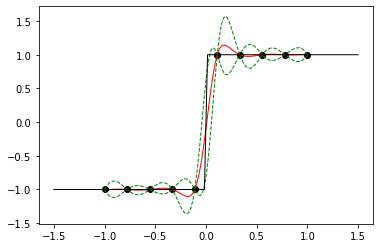

In [11]:
s=np.sqrt(var)
u=mu+2*s
l=mu-2*s
p=plt.plot(z,mu,color='r',alpha=1,lw=1)
p1=plt.plot(z,u,'--',color='g',lw=1)
p1=plt.plot(z,l,'--',color='g',lw=1)
plt.plot(Xt,Yt,color='black',lw=1)
plt.scatter(X,Y,color='black')

In [54]:
m.train(N=1000,sub_burn=10,method='L-BFGS-B')

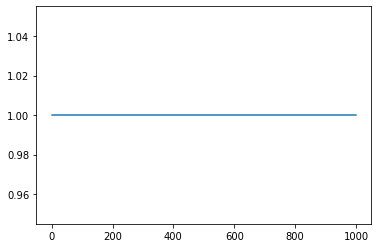

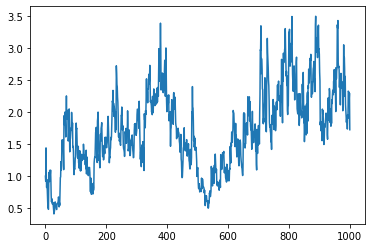

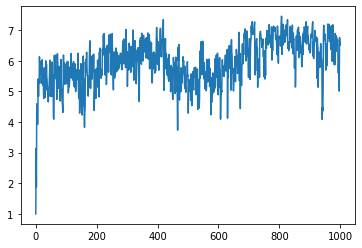

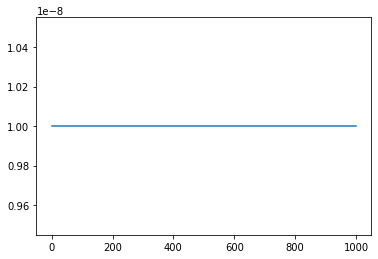

In [55]:
m.plot(3)

In [56]:
m.update_final_kernel(750)

In [57]:
z=np.linspace(-2.,2.,100)[:,None].reshape(-1,1)
mu,var=m.predict(z, N=300, burnin=0,method='mean_var')

se = 0.05612789893301353


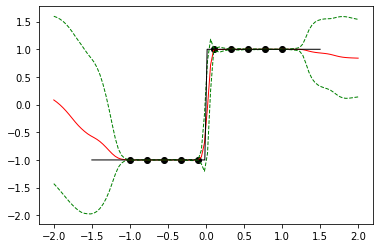

In [58]:
s=np.sqrt(var)
u=mu+2*s
l=mu-2*s
p=plt.plot(z,mu,color='r',alpha=1,lw=1)
p1=plt.plot(z,u,'--',color='g',lw=1)
p1=plt.plot(z,l,'--',color='g',lw=1)
plt.plot(Xt,Yt,color='black',lw=1)
plt.scatter(X,Y,color='black')

In [59]:
sample=m.predict(z, N=0, burnin=0,method='sampling')

se = 0.05612789893301353


(-1.5, 1.5)

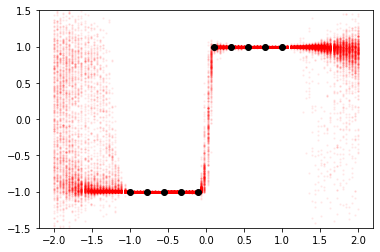

In [60]:
fig = plt.figure()
ax = fig.gca()
for i in range(len(sample)):
    surf = ax.scatter(z.flatten(),sample[i,],s=2,color='r',alpha=0.05)
#plt.plot(Xt,Yt,color='black',lw=1)
plt.scatter(X,Y,color='black')
plt.ylim([-1.5,1.5])

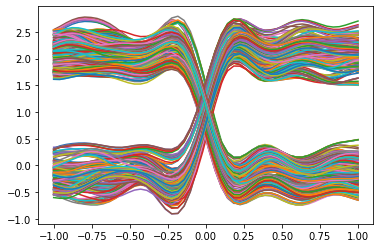

In [105]:
for i in range(len(m.samples[1])):
    plt.plot(m.samples[0][i],m.samples[1][i])

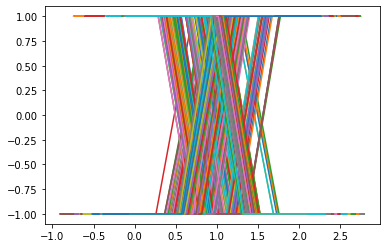

In [106]:
for i in range(len(m.samples[1])):
    plt.plot(m.samples[1][i],m.samples[2][i])